<a href="https://colab.research.google.com/github/Priziya/Price-prediction/blob/main/Copy_of_HPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Delhi houedata.csv')


In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['prefarea'].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

<Axes: xlabel='area', ylabel='price'>

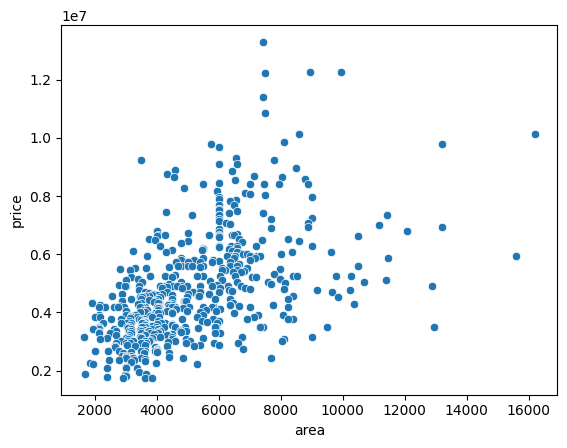

In [ ]:
sns.scatterplot(x=data['area'],y=data['price'])

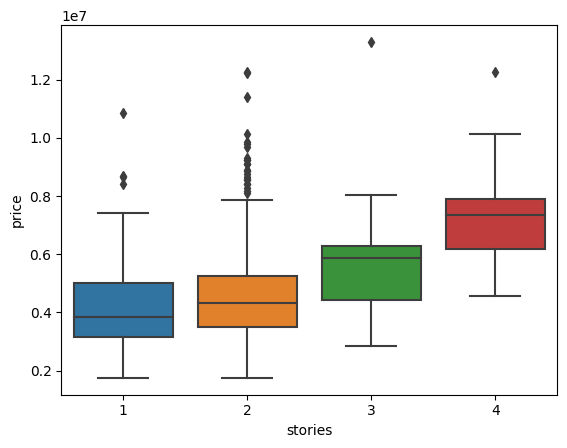

In [ ]:
sns.boxplot(x=data['stories'],y=data['price'])
plt.show()

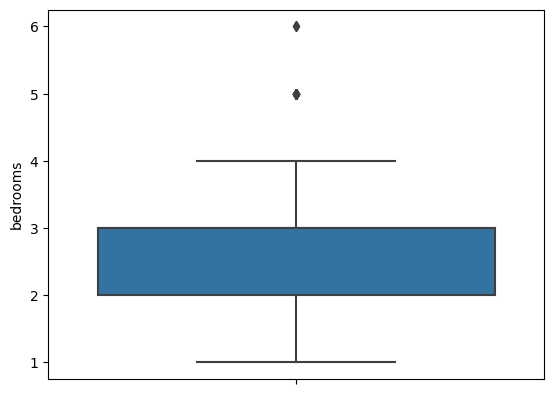

In [ ]:
sns.boxplot(y=data['bedrooms'])
plt.show()

In [ ]:
data['bedrooms']

0      4
1      4
2      3
3      4
4      4
      ..
540    2
541    3
542    2
543    3
544    3
Name: bedrooms, Length: 545, dtype: int64

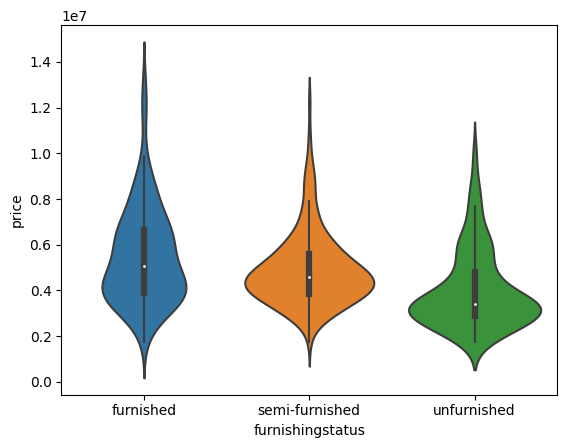

In [ ]:
sns.violinplot(x=data['furnishingstatus'],y=data['price'])
plt.show()

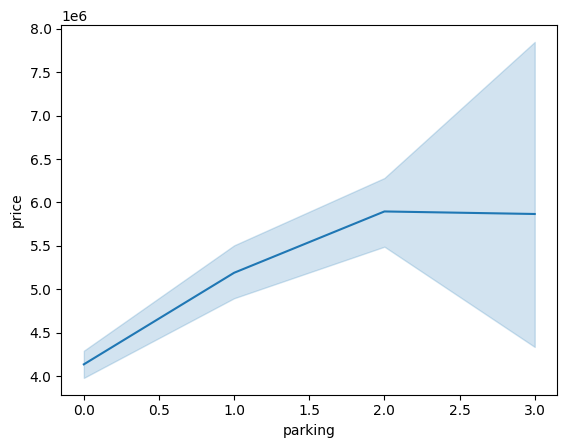

In [ ]:
sns.lineplot(x=data['parking'],y=data['price'])
plt.show()

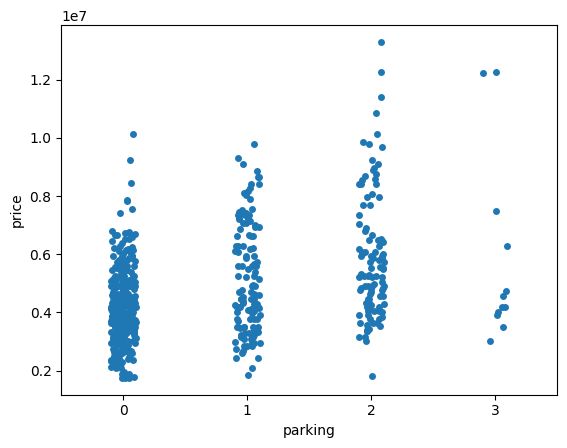

In [ ]:
sns.stripplot(x=data['parking'],y=data['price'])
plt.show()

In [ ]:
corr = data.corr()
corr

<ipython-input-18-df690e1cacaf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [ ]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
cat_data = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for i in cat_data:
  data[i] = lb.fit_transform(data[i])

In [ ]:
def eval(model):
  print("The training score is,",model.score(x_train,y_train),end='\n')
  print("The testing score is,",model.score(x_test,y_test))

In [ ]:
def metric_score(ypred,y_test):
  print("The mean absolute error is:",mean_absolute_error(ypred,ytest))
  print("The mean squared error is:",mean_squared_error(ypred,ytest))
  print("The R2 score is: ", r2_score(ypred,y_test))

**Splitting the data**


In [ ]:
x=data.drop('price',axis=1)
y=data.price

In [ ]:
print(x.head())
print(y.head())

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 0  
1                0                1        3         0                 0  
2                0                0        2         1                 1  
3                0                1        3         1                 0  
4                0                1        2         0                 0  
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,confusion_matrix,r2_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(436, 12)
(109, 12)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = data[['area', 'bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
y = data['price']


regr = linear_model.LinearRegression()
model = regr.fit(x, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 101866.51305206865
Coefficients: [ 2.43906887e+02  1.19474386e+05  9.88888287e+05  4.50391518e+05
  4.23100741e+05  2.98030507e+05  3.57926360e+05  8.72936027e+05
  8.53633595e+05  2.79785637e+05  6.47055599e+05 -2.13187781e+05]


The equation of the given data is : y= 101866.513+ 2.43x_{1}+1.19x_{2}+9.88x_{3}+......+6.47x_{11}-2.13x_{12}

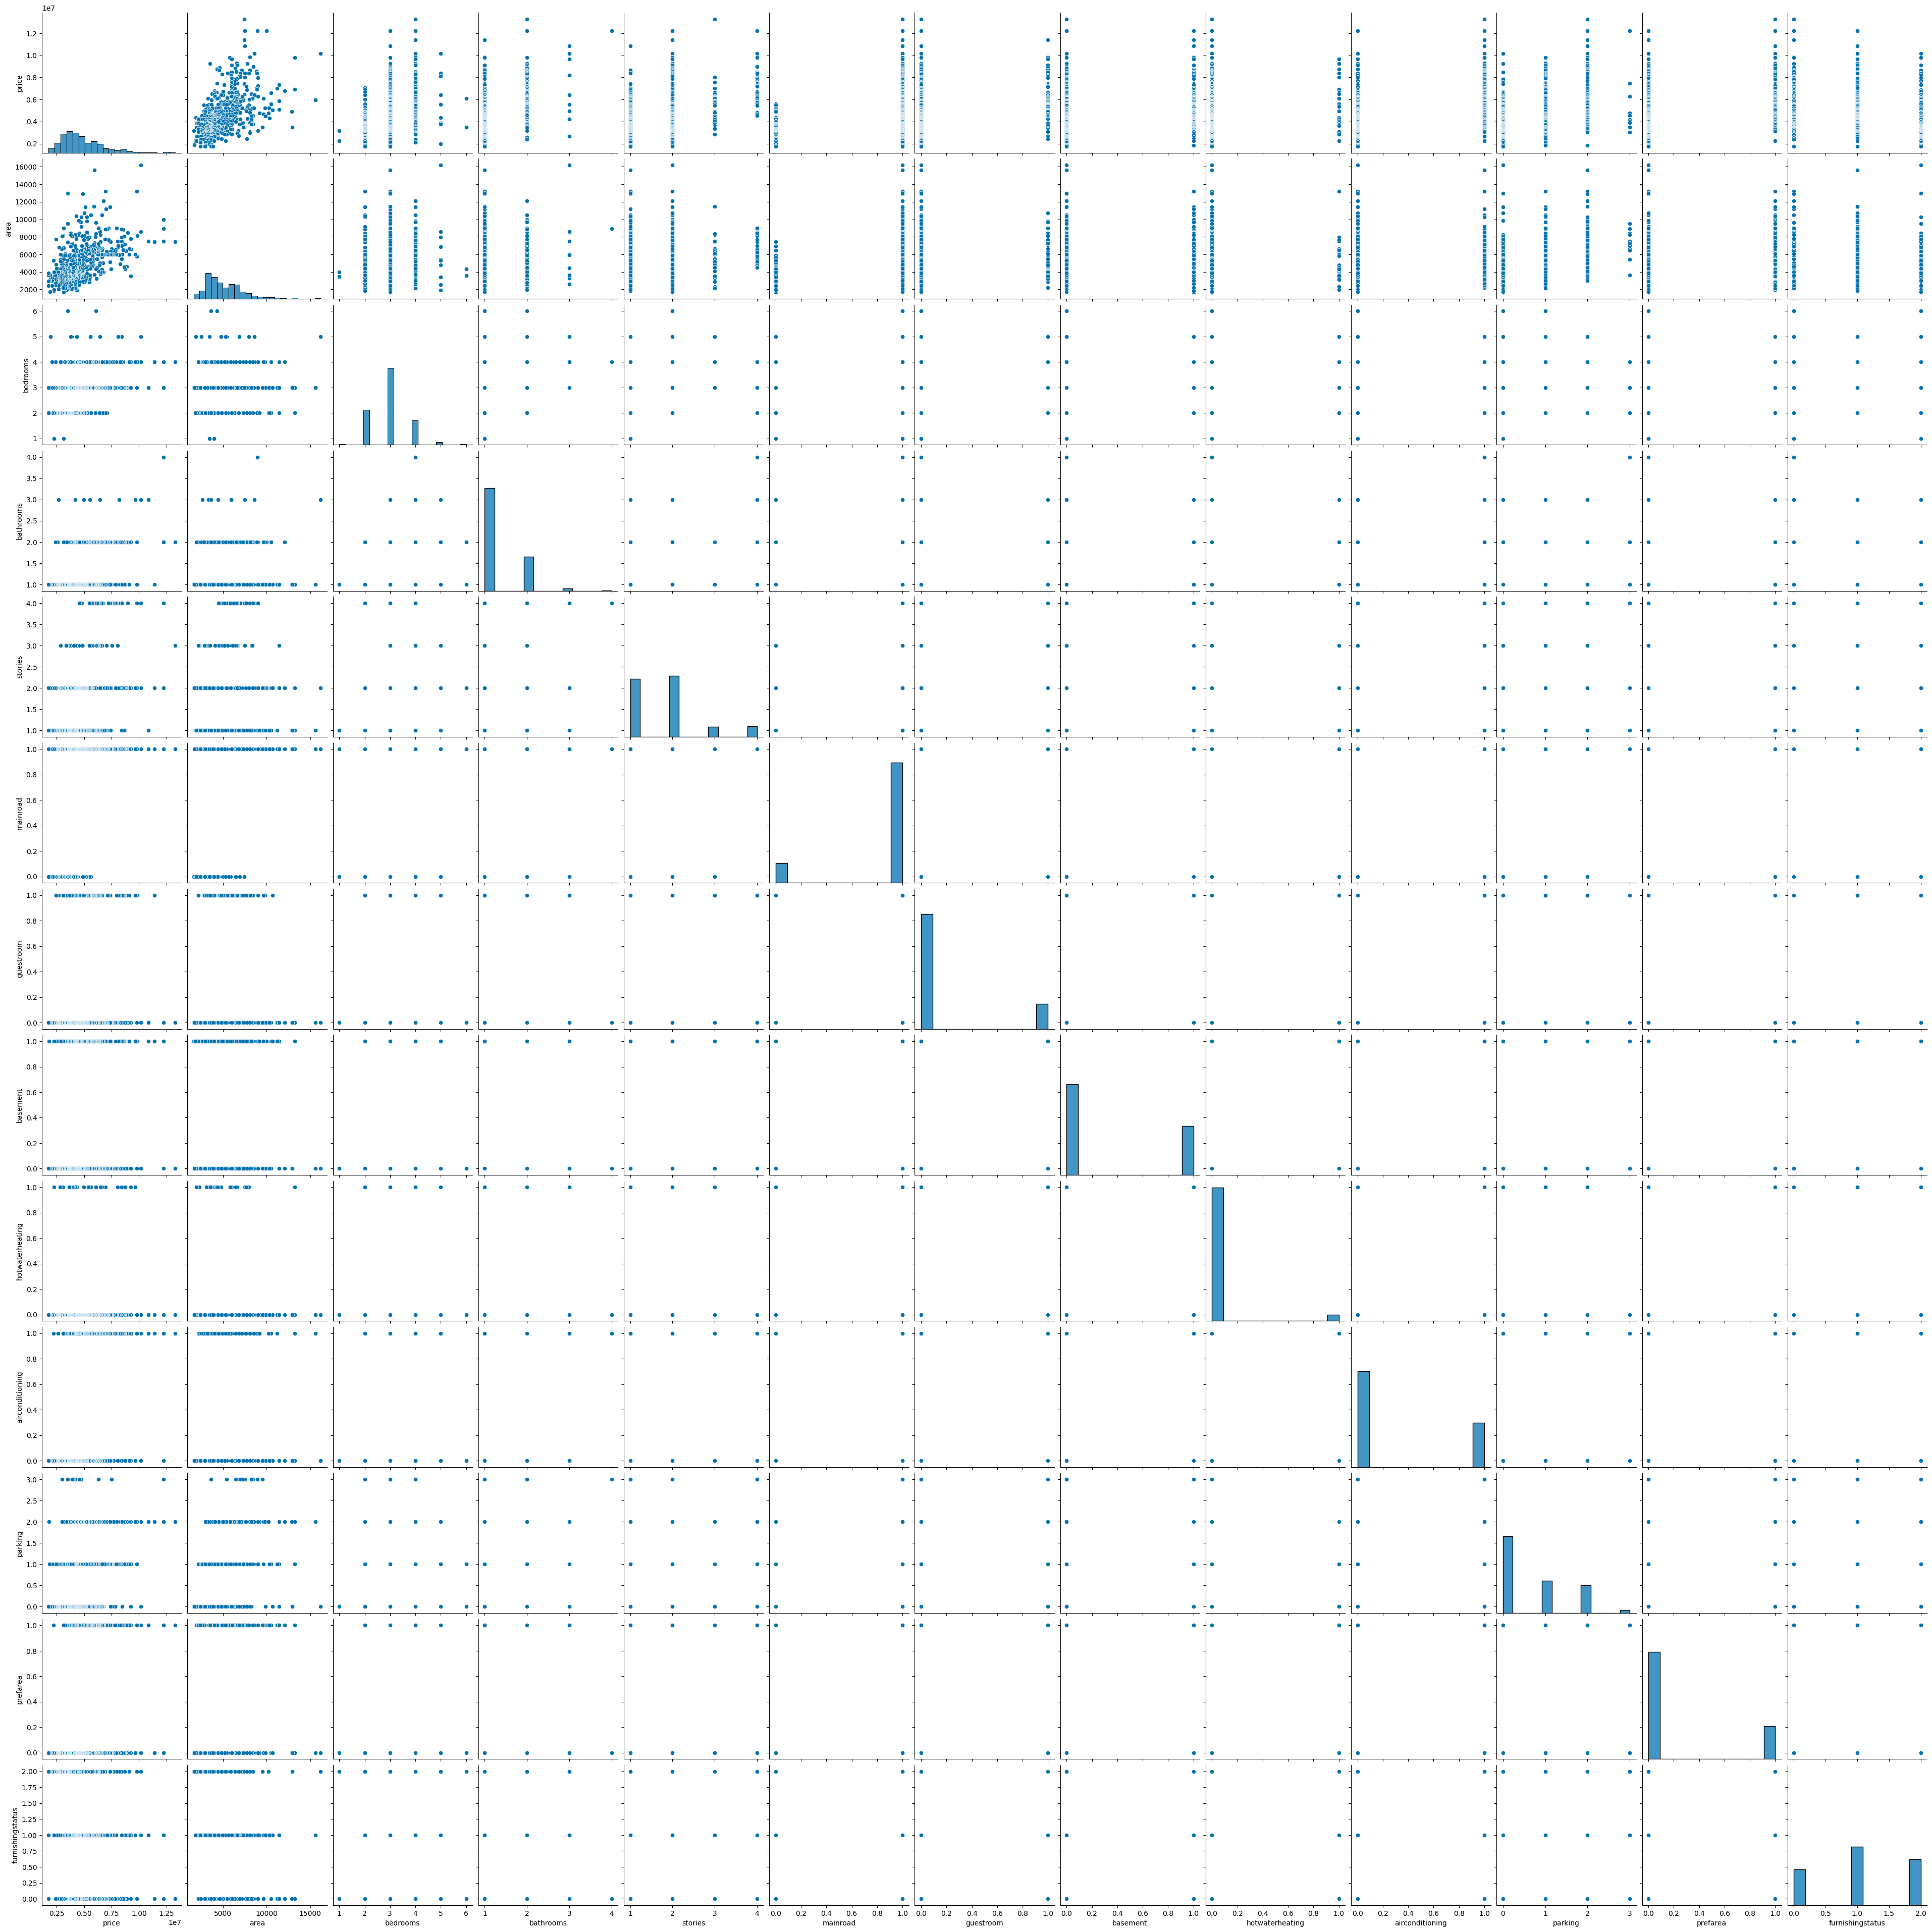

In [ ]:
sns.set_palette('colorblind')
sns.pairplot(data=data, height=3)

HOUSE PRICE PREDICTOR

In [ ]:
area = input('What is the area of the house? \n')
bedrooms= input('How many bedrooms are there? \n')
bathrooms=input('How many bathrooms are there?\n')
stories=input('Number of stories?\n')
mainroad=input('Is the house nearby mainroad?\n')
guestroom=input('How many guestroom are there?\n')
basement=input('Is basement available or not?\n')
hotwaterheating=input('Is hotwaterheating avaiable?\n')
airconditioning=input('Is airconditioning available?\n')
parking=input('Is parking available?\n')
prefarea=input('Is the house in the preferred area?\n')
furnishingstatus=input('What is the furnishing status?\n')


try:
    print('We predict {:.0f} is the price of the house if the area is ${}, number of bedrooms are ${},number of bathrooms are ${}, number of stories are ${}, if the house is nearby mainroad ${},number of guestroom ${},if basement is there ${},if hotwaterheating is available ${},if airconditioning is available ${},if parking is there ${},if the house is in preferred area ${} and the furnishing status is ${} .'.format(
        model.predict([[int(area), int(bedrooms),int(bathrooms),int(stories),int(mainroad),int(guestroom),int(basement),int(hotwaterheating),int(airconditioning),int(parking),int(prefarea),int(furnishingstatus)]])[0],
        area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus))
except ValueError:
    print('Please only input either:\n-whole number e.g. 1,4,7\n-decimal/float number e.g. 2.8')

What is the area of the house? 
7420
How many bedrooms are there? 
2
How many bathrooms are there?
3
Number of stories?
2
Is the house nearby mainroad?
1
How many guestroom are there?
1
Is basement available or not?
1
Is hotwaterheating avaiable?
1
Is airconditioning available?
2
Is parking available?
2
Is the house in the preferred area?
1
What is the furnishing status?
2
We predict 10457564 is the price of the house if the area is $7420, number of bedrooms are $2,number of bathrooms are $3, number of stories are $2, if the house is nearby mainroad $1,number of guestroom $1,if basement is there $1,if hotwaterheating is available $1,if airconditioning is available $2,if parking is there $2,if the house is in preferred area $1 and the furnishing status is $2 .


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Multiple Linear regression


In [ ]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['prefarea']),remainder="passthrough")

In [ ]:
scaler = StandardScaler()

In [ ]:
lr = LinearRegression()

In [ ]:
pipe = make_pipeline(column_trans,scaler, lr)

In [ ]:
pipe.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['prefarea'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred_lr=pipe.predict(x_test)

In [ ]:
r2_score(y_test,y_pred_lr)

0.6626233525994515

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred_lr))

985980.1923157956

In [ ]:
np.log10(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

5.993868190342472

***Lasso Regression***

In [ ]:
y=np.log10(y)

In [ ]:
lasso=Lasso()

In [ ]:
pipe=make_pipeline(column_trans,scaler,lasso)

In [ ]:
pipe.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['prefarea'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [ ]:
y_pred_lasso=pipe.predict(x_test)

In [ ]:
r2_score(y_test,y_pred_lasso)

0.6578051895859296

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred_lasso))

992995.7522108918

In [ ]:
np.log10(np.sqrt(mean_squared_error(y_test,y_pred_lasso)))

5.996947390695466

**Ridge Regression**

In [ ]:
ridge=Ridge()

In [ ]:
pipe=make_pipeline(column_trans,scaler,ridge)

In [ ]:
pipe.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['prefarea'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
y_pred_ridge=pipe.predict(x_test)

In [ ]:
r2_score(y_test,y_pred_ridge)

0.6580787319277925

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred_ridge))

992598.784343662

In [ ]:
np.log10(np.sqrt(mean_squared_error(y_test,y_pred_ridge)))

5.996773738972162

In [ ]:
print("Multiple Linear Regression:",r2_score(y_test,y_pred_lr))
print("Lasso:",r2_score(y_test,y_pred_lasso))
print("Ridge:",r2_score(y_test,y_pred_ridge))

Multiple Linear Regression: 0.6626233525994515
Lasso: 0.6578051895859296
Ridge: 0.6580787319277925


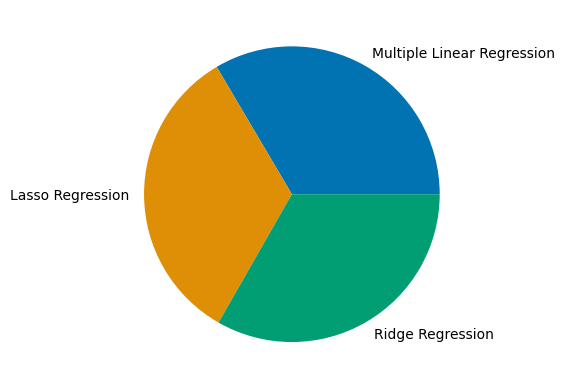

In [ ]:
import matplotlib.pyplot as plt
models = ['Multiple Linear Regression','Lasso Regression','Ridge Regression']
scores = [66.26,65.78,65.8]
plt.pie(scores,labels=models)
plt.show()

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

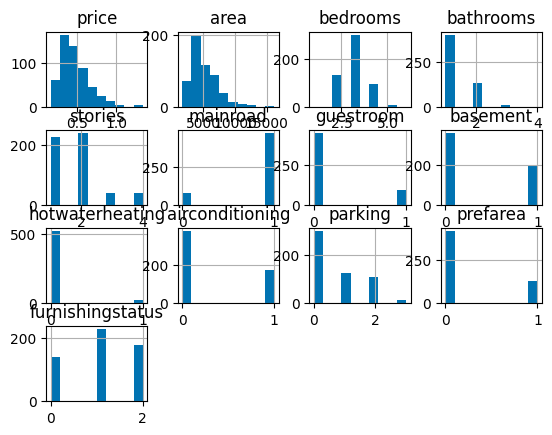

In [ ]:
data.hist()